# Project Overview 🔍
---

This project aims to forecast the stock price of Bank Negara Indonesia (BBNI) from 2012 to 2030 using multiple time series forecasting techniques. We'll implement Long Short-Term Memory (LSTM) networks, Sequential models, ARIMA models, and Facebook's Prophet in Google Colab. By comparing these methods, we can evaluate their performance and accuracy in predicting BBNI's stock prices over an extended period. Throughout this process, we'll leverage Google Colab's capabilities, including its GPU acceleration for faster model training, especially for the deep learning models (LSTM and Sequential). We'll use libraries such as TensorFlow, Keras, statsmodels, and fbprophet to implement the various forecasting techniques.

Datasource: https://id.investing.com/equities/bank-bni-tbk-historical-data

*With used end-to-end processes including analysis, and modeling with Deep Learning Algorithms. At the end of the Project Summary, I will provide all the conclusions to ascertain which algorithm method is most appropriate in this case.* **Let's Explore!**

# Data Collection and Preparation

In [19]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Forecasting/Data_Historis_BBNI.csv')
df.head()

,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah,Vol.,Perubahan%
0,12/07/2024,5.025,4.92,5.125,4.92,"158,76M","3,18%"
1,11/07/2024,4.870,4.85,4.880,4.83,"37,57M","1,04%"
2,10/07/2024,4.820,4.85,4.900,4.82,"48,70M","-0,82%"
3,09/07/2024,4.860,4.67,4.870,4.67,"87,46M","4,07%"
4,08/07/2024,4.670,4.73,4.740,4.67,"36,00M","-0,64%"


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2982 entries, 0 to 2981
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tanggal     2982 non-null   object 
 1   Terakhir    2982 non-null   float64
 2   Pembukaan   2982 non-null   float64
 3   Tertinggi   2982 non-null   float64
 4   Terendah    2982 non-null   float64
 5   Vol.        2982 non-null   object 
 6   Perubahan%  2982 non-null   object 
dtypes: float64(4), object(3)
memory usage: 163.2+ KB


## Change Format Data

In [21]:
# Convert Tanggal to datetime format
df['Tanggal'] = pd.to_datetime(df['Tanggal'], format='%d/%m/%Y').dt.strftime('%d-%m-%Y')

# Convert Vol. to nominal integer values
df['Vol.'] = df['Vol.'].str.replace(',', '').str.replace('M', '').astype(float) * 1e6
df['Vol.'] = df['Vol.'].astype(int)

df.head()

,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah,Vol.,Perubahan%
0,12-07-2024,5.025,4.92,5.125,4.92,15876000000,"3,18%"
1,11-07-2024,4.870,4.85,4.880,4.83,3757000000,"1,04%"
2,10-07-2024,4.820,4.85,4.900,4.82,4870000000,"-0,82%"
3,09-07-2024,4.860,4.67,4.870,4.67,8746000000,"4,07%"
4,08-07-2024,4.670,4.73,4.740,4.67,3600000000,"-0,64%"


### Check Nulls

In [22]:
for col in df.columns.to_list():
    print(col, ": ", df[col].value_counts().sum())
    print("Null: ", df[col].isnull().sum())
    print(" ")

Tanggal :  2982
Null:  0
 
Terakhir :  2982
Null:  0
 
Pembukaan :  2982
Null:  0
 
Tertinggi :  2982
Null:  0
 
Terendah :  2982
Null:  0
 
Vol. :  2982
Null:  0
 
Perubahan% :  2982
Null:  0
 


In [13]:
df = df[['Tanggal', 'Terakhir']]

print(df)

         Tanggal  Terakhir
0     12-07-2024     5.025
1     11-07-2024     4.870
2     10-07-2024     4.820
3     09-07-2024     4.860
4     08-07-2024     4.670
...          ...       ...
2977  02-04-2012     4.050
2978  30-03-2012     4.000
2979  29-03-2012     3.975
2980  28-03-2012     3.950
2981  27-03-2012     3.975

[2982 rows x 2 columns]


In [14]:
df['Tanggal']

0       12-07-2024
1       11-07-2024
2       10-07-2024
3       09-07-2024
4       08-07-2024
           ...    
2977    02-04-2012
2978    30-03-2012
2979    29-03-2012
2980    28-03-2012
2981    27-03-2012
Name: Tanggal, Length: 2982, dtype: object

### Date Type Changed from Object to DateTime

In [15]:
import datetime

def str_to_datetime(s):
  split = s.split('-')
  day, month, year = int(split[0]), int(split[1]), int(split[2]) # Changed order to day, month, year
  return datetime.datetime(year=year, month=month, day=day)

df['Tanggal'] = df['Tanggal'].apply(str_to_datetime)
df['Tanggal']

0      2024-07-12
1      2024-07-11
2      2024-07-10
3      2024-07-09
4      2024-07-08
          ...    
2977   2012-04-02
2978   2012-03-30
2979   2012-03-29
2980   2012-03-28
2981   2012-03-27
Name: Tanggal, Length: 2982, dtype: datetime64[ns]

## Setting DataFrame Index with 'Tanggal' Column

In this section, we will learn how to set the index of a DataFrame using the `Tanggal` column. This is useful when you want to make `Tanggal` the reference point for your data, especially when working with time series data.

In [16]:
df.index = df.pop('Tanggal')
df

,Terakhir
Tanggal,
2024-07-12,5.025
2024-07-11,4.870
2024-07-10,4.820
2024-07-09,4.860
2024-07-08,4.670
...,...
2012-04-02,4.050
2012-03-30,4.000
2012-03-29,3.975


### Convert String DataType to Numerics

In [23]:
# Konversi semua nilai dalam kolom 'Vol.' ke string
df['Vol.'] = df['Vol.'].astype(str)

# Bersihkan data dan konversi ke float
df['Vol.'] = df['Vol.'].str.replace('M', '')  # Hapus 'M'
df['Vol.'] = df['Vol.'].str.strip()  # Trim spasi
df['Vol.'] = df['Vol.'].str.replace(',', '.')  # Ganti koma dengan titik jika ada

# Tangani nilai kosong atau tidak valid sebelum konversi
df['Vol.'] = df['Vol.'].replace('', '0')  # Ganti string kosong dengan '0'
df['Vol.'] = df['Vol.'].apply(lambda x: float(x) if x != 'None' else 0)  # Konversi ke float

# Konversi ke satuan juta
df['Vol.'] = df['Vol.'] * 1000000

In [24]:
# Pastikan semua nilai dalam kolom Perubahan% adalah string
df['Perubahan%'] = df['Perubahan%'].astype(str)

# Konversi Perubahan% ke numeric
df['Perubahan%'] = df['Perubahan%'].str.rstrip('%').str.replace(',', '.').astype('float') / 100.0

### Show the Last StockPrice

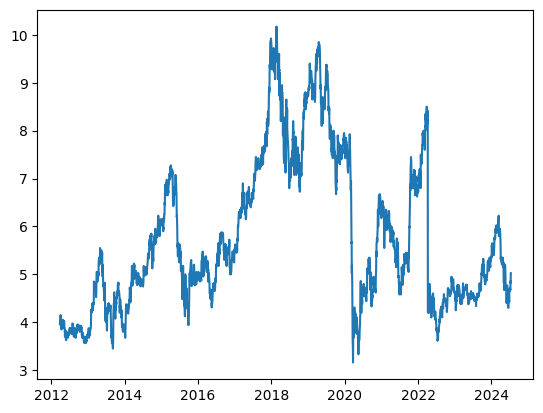

In [ ]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Terakhir'])

## Outliers Detection

In [ ]:
import plotly.express as px

# selects the numeric columns from the DataFrame.
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# creates a box plot using those numeric columns, with a title and standard deviation visualization
# within the boxes to help identify potential outliers in the numeric data.

fig = px.box(df, y=numeric_columns, title='Outliers Detection in Numeric Features')
fig.update_traces(boxmean='sd')  # Shows the standard deviation within the box
fig.show()

### Handling Outliers

In [26]:
# Asumsikan data sudah ada dalam DataFrame df dengan kolom 'Terakhir'
df = pd.DataFrame({'Terakhir': [3, 4, 4.5, 5, 5.5, 6, 6.5, 7, 10, 10.5]})

# Metode 1: Menghapus outlier menggunakan IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

df_no_outliers = remove_outliers_iqr(df, 'Terakhir')

# Metode 2: Menggunakan capping (winsorization)
def cap_outliers(df, column, lower_percentile=0.05, upper_percentile=0.95):
    lower_limit = df[column].quantile(lower_percentile)
    upper_limit = df[column].quantile(upper_percentile)
    df[column] = df[column].clip(lower_limit, upper_limit)
    return df

df_capped = cap_outliers(df.copy(), 'Terakhir')

# Metode 3: Menggunakan transformasi logaritmik
df['Terakhir_log'] = np.log1p(df['Terakhir'])

# Metode 4: Menggunakan z-score untuk mendeteksi dan menangani outlier
def handle_outliers_zscore(df, column, threshold=3):
    z_scores = np.abs((df[column] - df[column].mean()) / df[column].std())
    return df[z_scores < threshold]

df_zscore = handle_outliers_zscore(df, 'Terakhir')

print("Original data:")
print(df)
print("\nAfter IQR method:")
print(df_no_outliers)
print("\nAfter capping method:")
print(df_capped)
print("\nAfter log transformation:")
print(df[['Terakhir', 'Terakhir_log']])
print("\nAfter z-score method:")
print(df_zscore)

Original data:
   Terakhir  Terakhir_log
0       3.0      1.386294
1       4.0      1.609438
2       4.5      1.704748
3       5.0      1.791759
4       5.5      1.871802
5       6.0      1.945910
6       6.5      2.014903
7       7.0      2.079442
8      10.0      2.397895
9      10.5      2.442347

After IQR method:
   Terakhir
0       3.0
1       4.0
2       4.5
3       5.0
4       5.5
5       6.0
6       6.5
7       7.0
8      10.0

After capping method:
   Terakhir
0     3.450
1     4.000
2     4.500
3     5.000
4     5.500
5     6.000
6     6.500
7     7.000
8    10.000
9    10.275

After log transformation:
   Terakhir  Terakhir_log
0       3.0      1.386294
1       4.0      1.609438
2       4.5      1.704748
3       5.0      1.791759
4       5.5      1.871802
5       6.0      1.945910
6       6.5      2.014903
7       7.0      2.079442
8      10.0      2.397895
9      10.5      2.442347

After z-score method:
   Terakhir  Terakhir_log
0       3.0      1.386294
1       4.0      

## Normal Distribution

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objs as go

# Select numeric columns from the DataFrame
numeric_columns = df.select_dtypes(include=['float64']).columns
rows = len(numeric_columns)

fig = make_subplots(rows=rows, cols=1, subplot_titles=numeric_columns)

for i, column in enumerate(numeric_columns, start=1):
    fig.add_trace(
        go.Histogram(x=df[column], nbinsx=30, name=column, histnorm='probability density'),
        row=i, col=1
    )

# Update layout
fig.update_layout(height=200*rows, width=900, title_text="Normal Distribution of Numeric Features")
fig.show()

### Columns Correlation

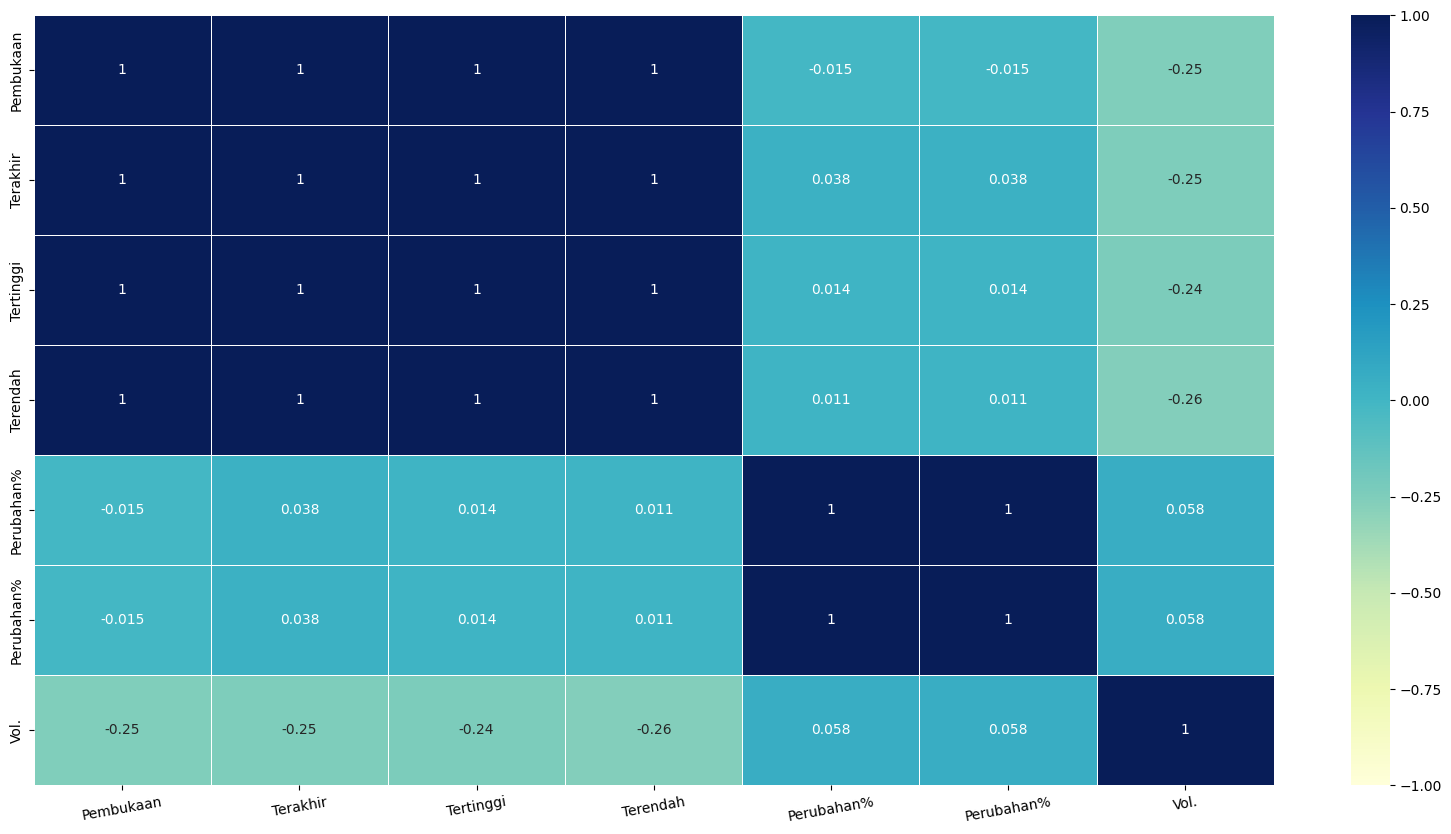

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

continous_col=['Pembukaan','Terakhir', 'Tertinggi', 'Terendah',
               'Perubahan%', 'Perubahan%', 'Vol.']
fig,ax=plt.subplots(figsize=(20,10))
sns.heatmap(df[continous_col].corr(),vmin=-1,vmax=1,annot=True,linewidths=0.5,ax=ax,cmap="YlGnBu")
plt.xticks(rotation=10)
plt.show()

## Creating a Windowed DataFrame for Time Series Analysis

In this section, we will learn how to create a windowed DataFrame for time series analysis using custom functions. This involves converting strings to datetime objects, slicing the DataFrame based on dates, and creating windows of data for model training.

In [ ]:
import numpy as np
import datetime
import pandas as pd # Import pandas since it's used in the code

def str_to_datetime(s): #String to Datetime Conversion Function:
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2]) # Corrected order to year, month, day
  return datetime.datetime(year=year, month=month, day=day)

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date

  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)

    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Terakhir'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]

    # Check if next_week is empty and handle it
    if next_week.empty:
      print(f"No data available for the week starting at {target_date}. Skipping...")
      target_date += datetime.timedelta(days=7) # Move to the next week
      if target_date > last_date:
        break
      continue

    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))

    if last_time:
      break

    target_date = next_date

    if target_date == last_date:
      last_time = True

  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates

  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]

  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2012-01-01'
windowed_df = df_to_windowed_df(df,
                                '2012-03-27',
                                '2024-06-14',
                                n=3)
windowed_df

No data available for the week starting at 2012-03-27 00:00:00. Skipping...
No data available for the week starting at 2012-04-03 00:00:00. Skipping...
No data available for the week starting at 2012-04-10 00:00:00. Skipping...
No data available for the week starting at 2012-04-17 00:00:00. Skipping...
No data available for the week starting at 2012-04-24 00:00:00. Skipping...
No data available for the week starting at 2012-05-01 00:00:00. Skipping...
No data available for the week starting at 2012-05-08 00:00:00. Skipping...
No data available for the week starting at 2012-05-15 00:00:00. Skipping...
No data available for the week starting at 2012-05-22 00:00:00. Skipping...
No data available for the week starting at 2012-05-29 00:00:00. Skipping...
No data available for the week starting at 2012-06-05 00:00:00. Skipping...
No data available for the week starting at 2012-06-12 00:00:00. Skipping...
No data available for the week starting at 2012-06-19 00:00:00. Skipping...
No data avai

,Target Date,Target-3,Target-2,Target-1,Target
0,2012-03-27,4.000,3.975,3.950,3.975
1,2012-04-03,3.900,4.025,4.025,4.150
2,2012-04-10,3.925,3.850,3.900,3.900
3,2012-04-17,3.950,3.950,3.975,3.925
4,2012-04-24,4.000,4.050,3.900,3.875
...,...,...,...,...,...
633,2024-05-14,5.175,5.200,5.025,4.930
634,2024-05-21,4.710,4.670,4.760,4.770
635,2024-05-28,4.400,4.490,4.530,4.710
636,2024-06-04,4.700,4.770,4.610,4.640


That's Result make a new DataFrame where each row contains a target date, the previous n values, and the target value for the date range specified.

### Convert to Array

In this section, we will learn how to convert a windowed DataFrame into separate arrays for dates, features (X), and targets (Y). This is useful for preparing time series data for machine learning models.

In [ ]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((638,), (638, 3, 1), (638,))

### Splitting and Plotting

In this section, we will learn how to split time series data into training, validation, and test sets, and how to visualize these splits using Matplotlib.

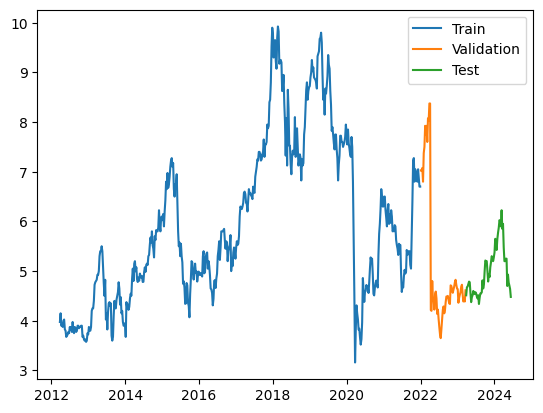

In [ ]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

# Build and Training LSTM Model

In [ ]:
from keras.models import Sequential # Used to initialize the model as a linear stack of layers.
from keras.optimizers import Adam # A popular optimization algorithm.
from keras import layers # Contains different types of neural network layers.

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse',
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
16/16 [==============================] - 3s 41ms/step - loss: 27.7804 - mean_absolute_error: 5.0284 - val_loss: 11.5292 - val_mean_absolute_error: 3.1933
Epoch 2/100
16/16 [==============================] - 0s 7ms/step - loss: 8.0655 - mean_absolute_error: 2.3391 - val_loss: 0.7989 - val_mean_absolute_error: 0.8253
Epoch 3/100
16/16 [==============================] - 0s 7ms/step - loss: 1.6090 - mean_absolute_error: 1.1205 - val_loss: 1.3130 - val_mean_absolute_error: 1.0835
Epoch 4/100
16/16 [==============================] - 0s 8ms/step - loss: 0.9810 - mean_absolute_error: 0.7733 - val_loss: 0.5704 - val_mean_absolute_error: 0.6805
Epoch 5/100
16/16 [==============================] - 0s 7ms/step - loss: 0.7287 - mean_absolute_error: 0.7042 - val_loss: 0.6341 - val_mean_absolute_error: 0.7578
Epoch 6/100
16/16 [==============================] - 0s 7ms/step - loss: 0.5291 - mean_absolute_error: 0.5986 - val_loss: 0.3312 - val_mean_absolute_error: 0.5306
Epoch 7/100
16/16 [

By running the above code, you will see a plot showing the training and validation loss over 100 epochs. This helps in understanding how well the model is learning and generalizing to unseen data.

## Visualizing Training Predictions vs Actual Observations

In this section, we will learn how to visualize the predictions of a trained, validated, and tested LSTM model against the actual observations in the training dataset. This involves making predictions on the training, validation, testing data and plotting these predictions alongside the actual values.

16/16 [==============================] - 1s 3ms/step


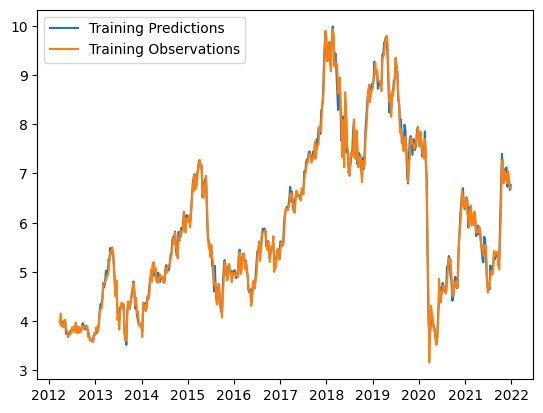

In [ ]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

**Visual Representation**:

By running the above code, you will see a plot with two lines:

- Predictions: Representing the model's predicted values for the training data.
- Observations: Representing the actual target values for the training data.

**Insight Analysi**:

- Comparison: This visualization allows you to directly compare the model's predictions to the actual values, providing insight into how well the model has learned the underlying patterns in the training data.
- Model Performance: If the predictions closely follow the actual values, it indicates that the model is performing well on the training data.

If there is a significant deviation, it may suggest that the model needs further tuning or that the training data has issues that need to be addressed.

## Visualizing Validation Predictions vs Actual Observations

2/2 [==============================] - 0s 6ms/step


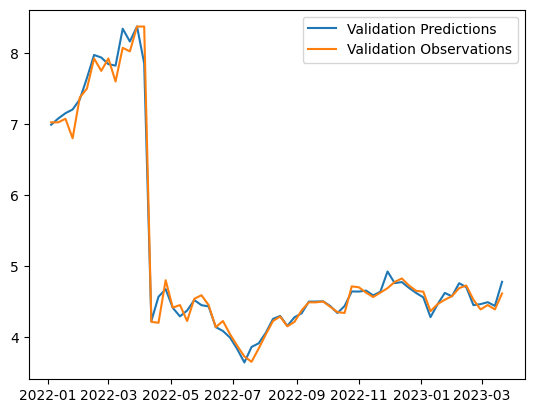

In [ ]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

**Model Evaluation**: Plotting validation predictions against actual observations is crucial for understanding the model's performance on unseen data, which is a key aspect of model evaluation in machine learning.

## Visualizing Test Predictions vs Actual Observations

2/2 [==============================] - 0s 5ms/step


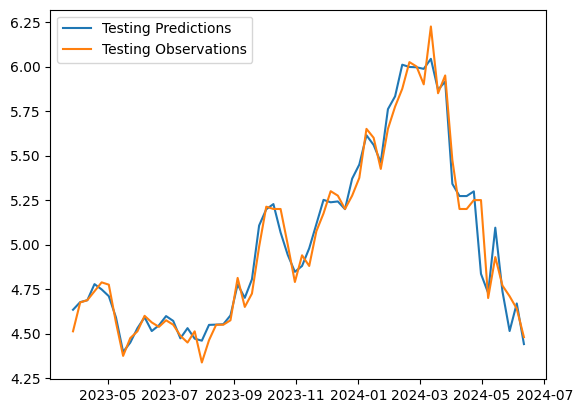

In [ ]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

**Final Evaluation:** Plotting test predictions against actual observations is a critical step for final model evaluation. It helps ensure that the model can generalize well to completely new data, which is essential for real-world applications.

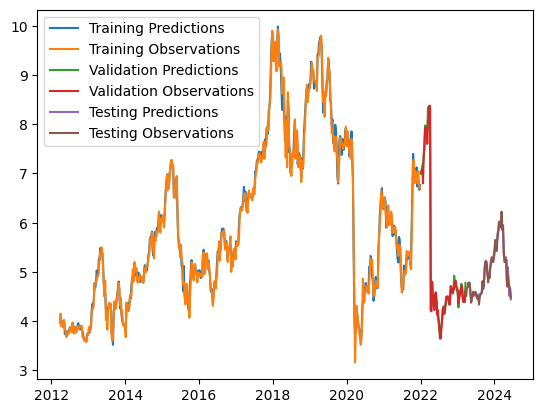

In [ ]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations'])

### Recursive Predictions

In this section, we will explore how to generate recursive predictions using a trained LSTM model. This technique involves predicting one step ahead at a time and using each prediction as input for the next prediction, allowing for a sequence of future predictions beyond the training and validation/test datasets.

In [ ]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

1/1 [==============================] - 0s 21ms/step


Analysis:

- Recursive Prediction Approach: This method enables forecasting multiple steps into the future by recursively predicting each subsequent value based on the previous prediction.
- Model Adaptability: The approach leverages the LSTM model's ability to capture sequential patterns and make accurate predictions, potentially capturing trends or seasonality in time-series data.

Importance:
- Future Forecasting: Generating recursive predictions is essential for applications requiring forecasting beyond the initial dataset boundaries, providing insights into future trends or scenarios.
- Validation: Comparing recursive predictions with actual future data can validate the model's accuracy and robustness in predicting unseen data, ensuring its reliability for decision-making purposes.

### Comprehensive Visualization of Model Predictions and Observations

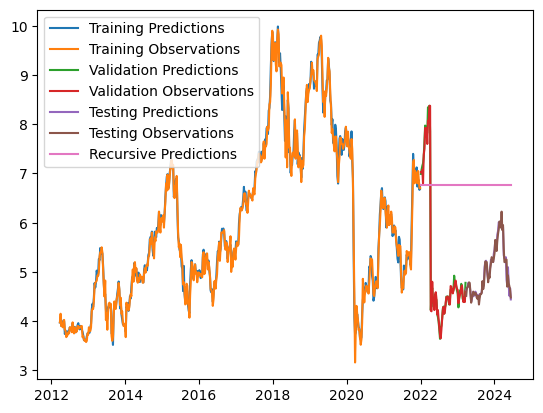

In [ ]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations',
            'Recursive Predictions'])

- Comprehensive Evaluation: This plot provides a holistic view of how the LSTM model's predictions compare to the actual observations across different datasets and for future forecasts.

- Model Performance: By visually inspecting each line, you can assess how well the model performs on training, validation, and test data, as well as its ability to make long-term predictions (recursive predictions).
Insights: It allows for insights into the model's strengths and weaknesses in capturing trends, patterns, and variations in the data over time.

---

# Second Way to Analyze

In [ ]:
import tensorflow
print(tensorflow.__version__)

2.15.0


In this topic, we will cover the necessary steps to install essential libraries using pip for data analysis and modeling tasks. These libraries are crucial for working with data, plotting graphs, performing statistical analysis, and implementing machine learning models.

## Python Install Packages

Installing Required Libraries for Data Analysis and Modeling

In [ ]:
# Langkah 1: Instalasi Library yang Dibutuhkan
!pip install pandas matplotlib numpy statsmodels tensorflow

## Import Library

In [ ]:
# Langkah 2: Import Library yang Dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

### Preprocessing Data

Descriptive analysis is an important part of the data preprocessing process and is often considered the first step in data analysis. It helps us understand the basic characteristics of the dataset before performing more complex analysis or building predictive models.

In [ ]:
# Langkah 3: Membaca Data CSV
data_path = '/content/drive/MyDrive/Forecasting/Data_Historis_BBNI.csv'
df = pd.read_csv(data_path)

In [ ]:
# Menampilkan beberapa baris pertama data
df.head()

,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah,Vol.,Perubahan%
0,12/07/2024,5.025,4.92,5.125,4.92,"158,76M","3,18%"
1,11/07/2024,4.870,4.85,4.880,4.83,"37,57M","1,04%"
2,10/07/2024,4.820,4.85,4.900,4.82,"48,70M","-0,82%"
3,09/07/2024,4.860,4.67,4.870,4.67,"87,46M","4,07%"
4,08/07/2024,4.670,4.73,4.740,4.67,"36,00M","-0,64%"


In [ ]:
df.columns

Index(['Tanggal', 'Terakhir', 'Pembukaan', 'Tertinggi', 'Terendah', 'Vol.',
       'Perubahan%'],
      dtype='object')

In [ ]:
# Langkah 4: Pra-pemrosesan Data
# Pastikan kolom tanggal dalam format datetime
df['Tanggal'] = pd.to_datetime(df['Tanggal'], format='%d/%m/%Y') # Specify the correct date format
df.set_index('Tanggal', inplace=True)

In [ ]:
# Menyortir data berdasarkan tanggal
df = df.sort_index()

In [ ]:
# Menampilkan statistik deskriptif
df.describe()

,Terakhir,Pembukaan,Tertinggi,Terendah
count,2982.000000,2982.000000,2982.000000,2982.000000
mean,5.767355,5.769934,5.841625,5.693144
std,1.567107,1.565463,1.581785,1.549133
min,3.160000,3.160000,3.410000,2.970000
25%,4.580000,4.582000,4.640000,4.525000
50%,5.300000,5.300000,5.375000,5.225000
75%,6.950000,6.950000,7.050000,6.850000
max,10.175000,10.175000,10.250000,9.900000


### Visualize Trends in Stock Closing Prices

In this topic, we will demonstrate how to plot stock closing prices to visualize trends over time using matplotlib in Python.

This code segment demonstrates how to plot and customize a line plot of stock closing prices ('Terakhir' column) from a DataFrame (df). It allows visualization of trends over time, providing insights into the historical performance of stock prices.

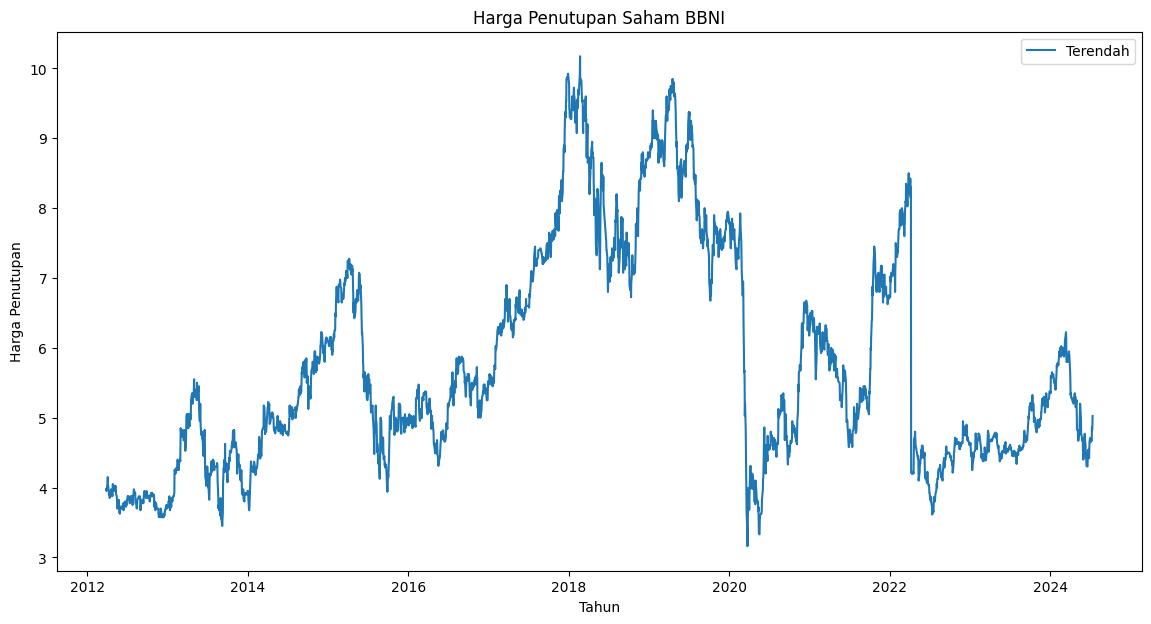

In [ ]:
# Langkah 5: Plot Data untuk Melihat Trend
plt.figure(figsize=(14, 7))
plt.plot(df['Terakhir'], label='Terendah')
plt.title('Harga Penutupan Saham BBNI')
plt.xlabel('Tahun')
plt.ylabel('Harga Penutupan')
plt.legend()
plt.show()

**Usage:**
Data Analysis: Use to visualize trends and patterns in stock prices over time.
Investment Decision: Analyze historical performance to make informed investment decisions.
Reporting: Create visual reports for stakeholders or presentations.

**Importance:**
Visualization: Visualizing data helps in understanding trends and patterns that may impact decision-making processes in stock trading or investment strategies.
Communication: Effective graphical representation of data aids in conveying insights to stakeholders or team members.
Analysis: Enables analysis of historical performance and identification of potential patterns or anomalies in stock prices.

In [ ]:
# Langkah 6: Model ARIMA untuk Forecasting
# Menggunakan harga penutupan untuk ARIMA
data = df['Terakhir']

### Split Data for Training and Testing

In [ ]:
# Split data menjadi train dan test
train_data, test_data = data[:int(len(data)*0.8)], data[int(len(data)*0.8):]

## Training ARIMA Model

AutoRegressive Integrated Moving Average (ARIMA) is A statistical model that uses historical data by considering trends to predict time series data. It is an effective way to deal with data that is not stationary or has trends and seasonality.

In [ ]:
# Membuat dan melatih model ARIMA
model = ARIMA(train_data, order=(5, 1, 0))
arima_model = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


**Importance:**

- Predictive Power: ARIMA models can capture complex temporal dependencies and trends in data, making them versatile for forecasting future trends.
- Interpretability: Parameters of ARIMA models (p, d, q) provide insights into the underlying patterns and dynamics of the time series data.
- Applications: Widely used in industries where understanding and predicting time-dependent processes are critical, such as finance for stock market predictions, retail for demand forecasting, etc.

## Make Prediction

In this topic, we will demonstrate how to use an ARIMA model to predict future values based on historical data and visualize the predictions alongside the actual test data using matplotlib in Python.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


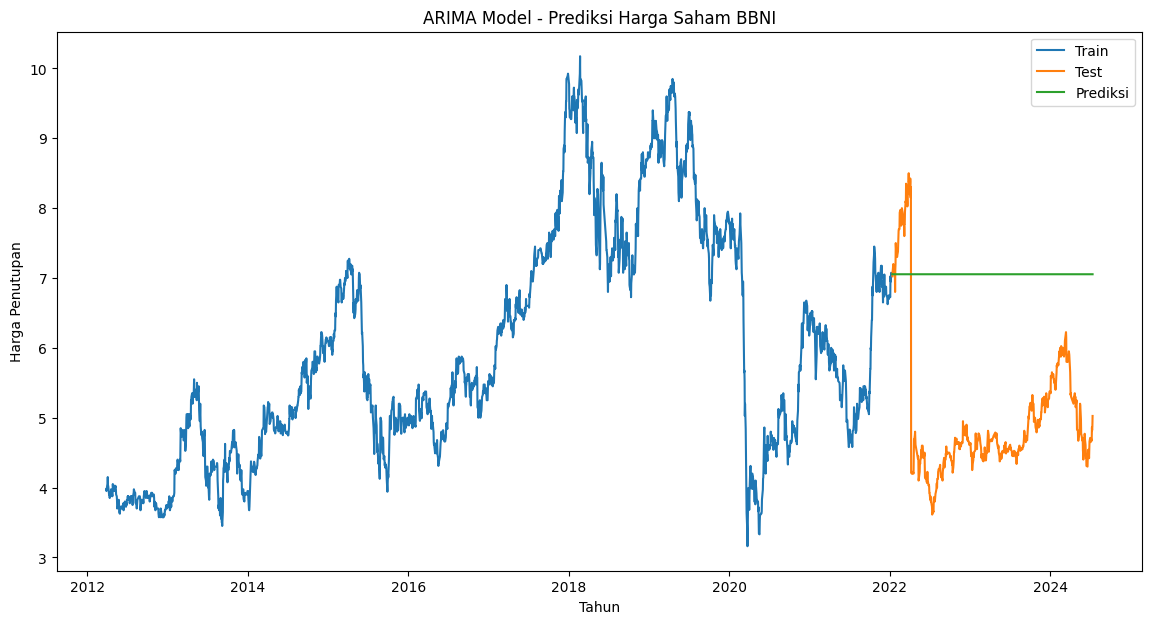

In [ ]:
# Memprediksi data
predictions = arima_model.forecast(steps=len(test_data))
plt.figure(figsize=(14, 7))
plt.plot(train_data.index, train_data, label='Train')
plt.plot(test_data.index, test_data, label='Test')
plt.plot(test_data.index, predictions, label='Prediksi')
plt.title('ARIMA Model - Prediksi Harga Saham BBNI')
plt.xlabel('Tahun')
plt.ylabel('Harga Penutupan')
plt.legend()
plt.show()

### LSTM Model for Forecasting - Data Scaling

In this topic, we will cover the steps involved in preparing data for LSTM (Long Short-Term Memory) model training by scaling the data using MinMaxScaler in Python.

In [ ]:
# Langkah 7: Model LSTM untuk Forecasting
# Skalakan data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df['Terakhir'].values.reshape(-1,1))

**Usage:**
- Data Preparation: Scaling data ensures that all features are on a comparable scale, preventing any single feature from dominating the learning process.
- Neural Network Training: Essential preprocessing step for training deep learning models like LSTM, improving convergence speed and performance.
- Normalization: Allows the model to learn patterns effectively across various scales of data without biases.

**Importance:**
- Enhanced Model Performance: Scaling helps neural networks handle a wide range of input values more effectively, enhancing model accuracy and stability.
- Standardization: Ensures consistent interpretation and treatment of data across different features, facilitating better model generalization.
- Applications: Widely applied in time series forecasting, natural language processing, and image recognition tasks where data normalization is crucial for model efficacy.

### Creating Dataset for LSTM

In [ ]:
# Membuat dataset untuk LSTM
prediction_days = 2190

x_train, y_train = [], []

for x in range(prediction_days, len(scaled_data)):
    x_train.append(scaled_data[x-prediction_days:x, 0])
    y_train.append(scaled_data[x, 0])

### Preparing Input Data for LSTM Model

In this topic, we will cover the steps involved in preparing input data (`x_train`) for training an LSTM (Long Short-Term Memory) model in Python.

In [ ]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

## Build LSTM Model

**Long Short-Term Memory** (LSTM) is a type of neural network used in the field of machine learning, specifically to handle sequential data. LSTMs are a variant of Recurrent Neural Networks (RNN) designed to overcome the vanishing gradient problem often faced by RNNs when learning long-term dependencies in sequential data.

In [ ]:
#membangun model LSTM
model = Sequential()

# Hyperparameter Tuning
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

### Model Compiler

In [ ]:
# Compile model
model.compile(optimizer='adam', loss='mean_squared_error')

This compilation step is crucial as it defines how the model will learn from the data. The optimizer determines how the model updates its weights based on the loss, while the loss function quantifies how well the model is performing.

### Training LSTM Model

In [ ]:
# Melatih model
model.fit(x_train, y_train, batch_size=1, epochs=1)

792/792 [==============================] - 1070s 1s/step - loss: 0.0048


- Model Training: Adjusts model weights based on input data (x_train) and corresponding target labels (y_train), optimizing for accurate predictions.
- Iteration Control: Controls training iterations (epochs) and batch size (batch_size) to balance between model accuracy and computational efficiency.
- Evaluation: After training, evaluate model performance using validation data or testing data to assess its predictive capability.

### Create Testing Dataset

In [ ]:
# Membuat dataset testing
test_data = df['Terakhir'][len(df) - len(test_data) - prediction_days:].values
test_data = test_data.reshape(-1,1)
test_data = scaler.transform(test_data)

In [ ]:
x_test = []
y_test = data[len(data) - len(test_data):].values

for x in range(prediction_days, len(test_data)):
    x_test.append(test_data[x-prediction_days:x, 0])

In [ ]:
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

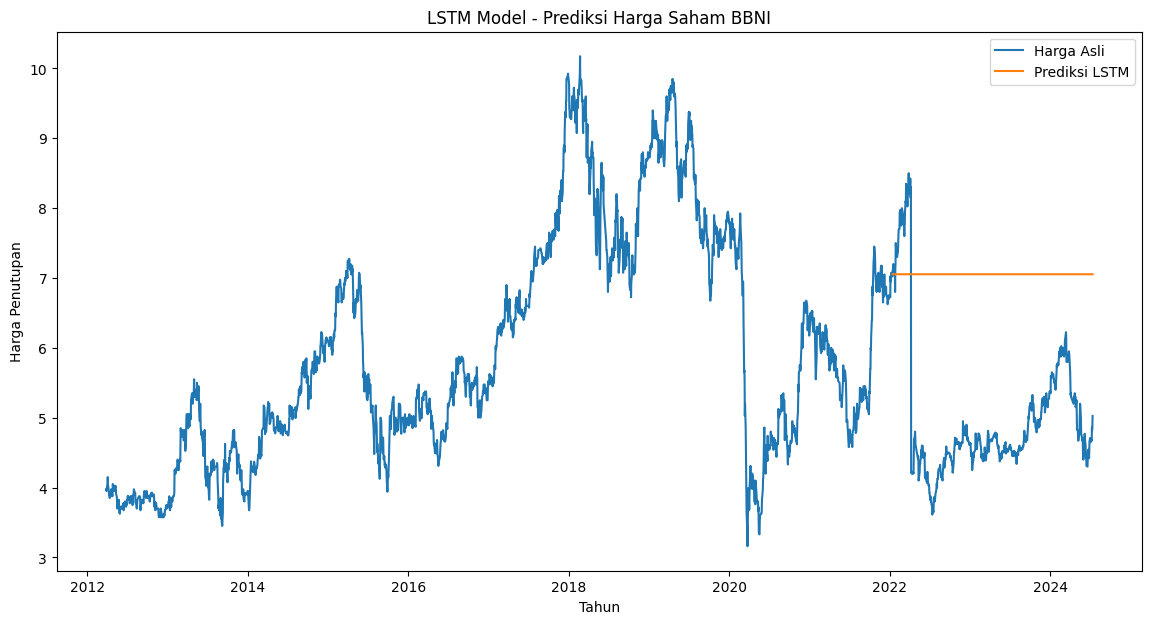

In [ ]:
# Plot hasil prediksi
plt.figure(figsize=(14, 7))
plt.plot(df['Terakhir'], label='Harga Asli')
plt.plot(df.index[-len(predictions):], predictions, label='Prediksi LSTM')
plt.title('LSTM Model - Prediksi Harga Saham BBNI')
plt.xlabel('Tahun')
plt.ylabel('Harga Penutupan')
plt.legend()
plt.show()

## Forecasting Until 2030 Using LSTM Model

In [ ]:
# Langkah 8: Forecasting hingga 2030 menggunakan model LSTM
# Mengambil data terakhir untuk prediksi
last_60_days = df['Terakhir'][-2190:].values
last_60_days_scaled = scaler.transform(last_60_days.reshape(-1,1))

In [ ]:
X_test = []
X_test.append(last_60_days_scaled)

In [ ]:
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
predicted_stock_price = []

for i in range(60*12*6):  # 12 bulan * 6 tahun
    pred_price = model.predict(X_test)
    predicted_stock_price.append(pred_price[0][0])
    last_60_days_scaled = np.append(last_60_days_scaled, pred_price, axis=0)
    last_60_days_scaled = last_60_days_scaled[1:]
    X_test = []
    X_test.append(last_60_days_scaled)
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

1/1 [==============================] - 0s 343ms/step


### Inverse Transformation of Predicted Stock Prices

Rescaling LSTM Output to Original Price Range

In this section, we'll convert our model's predictions from the scaled values back to the original stock price range. This step is crucial for interpreting our results in real-world terms.

In [ ]:
predicted_stock_price = scaler.inverse_transform(np.array(predicted_stock_price).reshape(-1, 1))

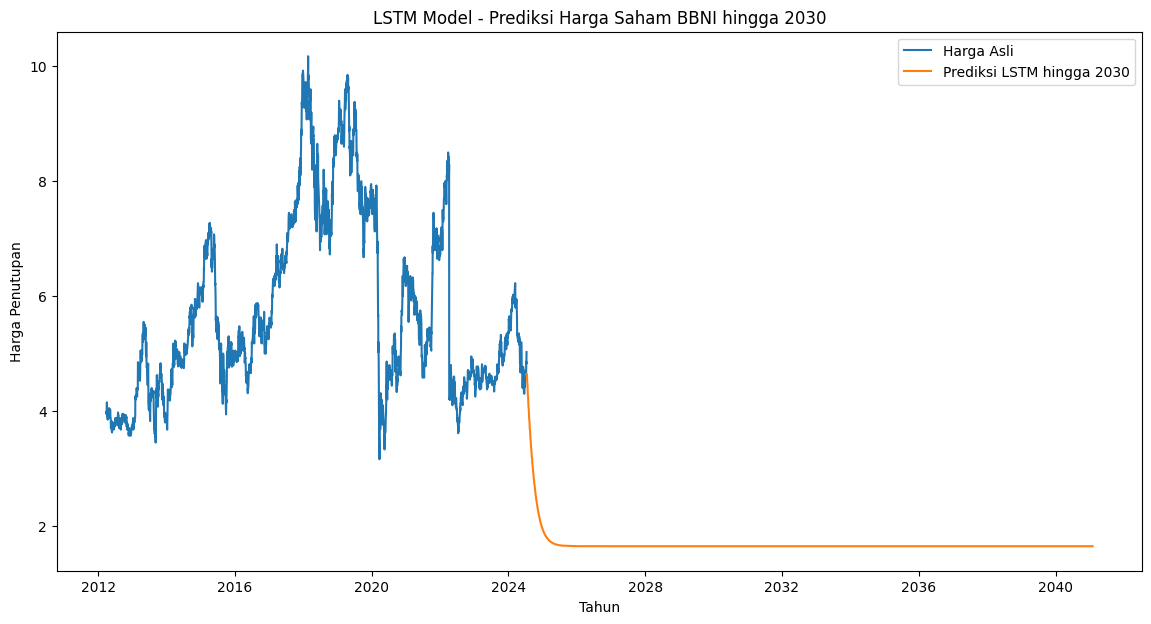

In [ ]:
# Plot prediksi hingga 2030
plt.figure(figsize=(14, 7))
plt.plot(df['Terakhir'], label='Harga Asli')
future_dates = pd.date_range(start=df.index[-1], periods=len(predicted_stock_price), freq='B')
plt.plot(future_dates, predicted_stock_price, label='Prediksi LSTM hingga 2030')
plt.title('LSTM Model - Prediksi Harga Saham BBNI hingga 2030')
plt.xlabel('Tahun')
plt.ylabel('Harga Penutupan')
plt.legend()
plt.show()

The image shows the results of an LSTM model prediction for BBNI stock prices from 2012 to 2030. The forecast appears problematic for several reasons:

- Abrupt Drop: There's a sudden, steep drop in the predicted price around 2024-2025, which doesn't align with the historical trend.
- Flat Prediction: After the drop, the forecast remains almost completely flat until 2030, which is unrealistic for stock prices.
- Unreasonably Low Values: The predicted values after the drop are much lower than any historical price, which seems implausible.

**This poor forecast could be due to several factors:**

The model may have overfitted to noise in the training data, failing to capture generalizable patterns. This issue could be exacerbated by insufficient historical data, particularly recent data, limiting the model's ability to make accurate future predictions. Additionally, the LSTM architecture may not be optimally configured for this specific forecasting task, further hampering its performance. The model's reliance solely on historical price data overlooks the myriad external factors that influence stock prices, leading to unrealistic projections. Finally, while LSTMs are generally effective for time series analysis, they often struggle with long-term predictions due to error accumulation over extended forecast horizons. These combined challenges result in the model's inability to produce reliable and realistic long-term stock price forecasts, as evidenced by the abrupt drop and subsequent flat predictions seen in the graph.

---

# Last Way to Forecast

In [ ]:
import pandas as pd # used for data manipulation and analysis, providing data structures like DataFrame.
import numpy as np # used for numerical operations on large multi-dimensional arrays and matrices.
import matplotlib.pyplot as plt # used for plotting and visualizing data.

from prophet import Prophet # A library developed by Facebook for time series forecasting.
from statsmodels.tsa.arima.model import ARIMA # A class from statsmodels library used for time series analysis, particularly Autoregressive Integrated Moving Average models.
from sklearn.preprocessing import MinMaxScaler # A preprocessing class from scikit-learn that scales features to a given range, often [0, 1]
from keras.models import Sequential #  A class from Keras that allows you to build neural network models layer by layer.
from keras.layers import LSTM, Dense #  A fully connected neural network layer used in Keras models
from sklearn.model_selection import train_test_split # A function from scikit-learn used to split data into training and testing sets.

In [ ]:
# Load data
df = pd.read_csv('/content/drive/MyDrive/Forecasting/Data_Historis_BBNI.csv')
df['Tanggal'] = pd.to_datetime(df['Tanggal'], format='%d/%m/%Y') # Specify the correct date format
df = df.sort_values('Tanggal')

In [ ]:
df.head()

,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah,Vol.,Perubahan%
2981,2012-03-27,3.975,4.000,4.000,3.950,"16,61M","0,63%"
2980,2012-03-28,3.950,3.975,4.000,3.900,"18,24M","-0,63%"
2979,2012-03-29,3.975,3.925,3.975,3.900,"22,76M","0,63%"
2978,2012-03-30,4.000,3.975,4.000,3.950,"22,87M","0,63%"
2977,2012-04-02,4.050,4.000,4.075,3.975,"46,49M","1,25%"


In [ ]:
df.columns

Index(['Tanggal', 'Terakhir', 'Pembukaan', 'Tertinggi', 'Terendah', 'Vol.',
       'Perubahan%'],
      dtype='object')

In [ ]:
# Konversi semua nilai dalam kolom 'Vol.' ke string
df['Vol.'] = df['Vol.'].astype(str)

# Bersihkan data dan konversi ke float
df['Vol.'] = df['Vol.'].str.replace('M', '')  # Hapus 'M'
df['Vol.'] = df['Vol.'].str.strip()  # Trim spasi
df['Vol.'] = df['Vol.'].str.replace(',', '.')  # Ganti koma dengan titik jika ada

# Tangani nilai kosong atau tidak valid sebelum konversi
df['Vol.'] = df['Vol.'].replace('', '0')  # Ganti string kosong dengan '0'
df['Vol.'] = df['Vol.'].apply(lambda x: float(x) if x != 'None' else 0)  # Konversi ke float

# Konversi ke satuan juta
df['Vol.'] = df['Vol.'] * 1000000

In [ ]:
# Pastikan semua nilai dalam kolom Perubahan% adalah string
df['Perubahan%'] = df['Perubahan%'].astype(str)

# Konversi Perubahan% ke numeric
df['Perubahan%'] = df['Perubahan%'].str.rstrip('%').str.replace(',', '.').astype('float') / 100.0

In [ ]:
df.head()

,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah,Vol.,Perubahan%
2981,2012-03-27,3.975,4.000,4.000,3.950,16610000.0,0.0063
2980,2012-03-28,3.950,3.975,4.000,3.900,18240000.0,-0.0063
2979,2012-03-29,3.975,3.925,3.975,3.900,22760000.0,0.0063
2978,2012-03-30,4.000,3.975,4.000,3.950,22870000.0,0.0063
2977,2012-04-02,4.050,4.000,4.075,3.975,46490000.0,0.0125


---

### Rename columns to match Prophet's expected format

In [ ]:
df.Tanggal = pd.to_datetime(df.Tanggal)
df = df.rename(columns = {'Tanggal':'ds', 'Terakhir':'y'}) # Date and Stockprice Type

#### Show Data Formatted

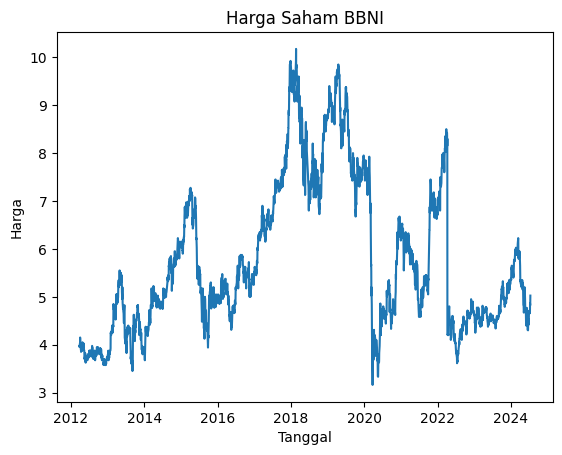

In [ ]:
# Visualize the data
plt.plot(df['ds'], df['y'])
plt.title('Harga Saham BBNI')
plt.xlabel('Tanggal')
plt.ylabel('Harga')
plt.show()

## Create Prophet Model

The Prophet model is an open-source library developed by Facebook to perform time series forecasting. This model is specifically designed to predict time series data that is seasonal and has a non-linear trend.

In [ ]:
# Create a Prophet object and fit it to the data
model = Prophet()
model.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz3ljkw1_/oj89333p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz3ljkw1_/r7m0zpfk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=667', 'data', 'file=/tmp/tmpz3ljkw1_/oj89333p.json', 'init=/tmp/tmpz3ljkw1_/r7m0zpfk.json', 'output', 'file=/tmp/tmpz3ljkw1_/prophet_modeluildjjs6/prophet_model-20240713061920.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:19:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:19:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


#### Generating Future Dates for Prediction

In [ ]:
# Create a future dataframe
future = model.make_future_dataframe(periods=2190) # Predict 6 years later
future.tail()

,ds
5167,2030-07-07
5168,2030-07-08
5169,2030-07-09
5170,2030-07-10
5171,2030-07-11


To generates a DataFrame of future dates that the Prophet model will use to make predictions. By specifying 2190 periods, we're setting up the model to forecast about 6 years into the future. This step is essential for long-term forecasting, as it provides the time points for which the model will generate predictions.

The `tail()` function helps us quickly verify that the future dates have been correctly generated.

#### Identify Forecasting Data

In [ ]:
# Make predictions for the future dates
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
5167,2030-07-07,1.758919,-13.213407,18.123214
5168,2030-07-08,1.678418,-13.503547,17.715550
5169,2030-07-09,1.678383,-13.251908,17.932262
5170,2030-07-10,1.690355,-13.233248,17.939148
5171,2030-07-11,1.698535,-13.533769,17.916691


### Forecast Result

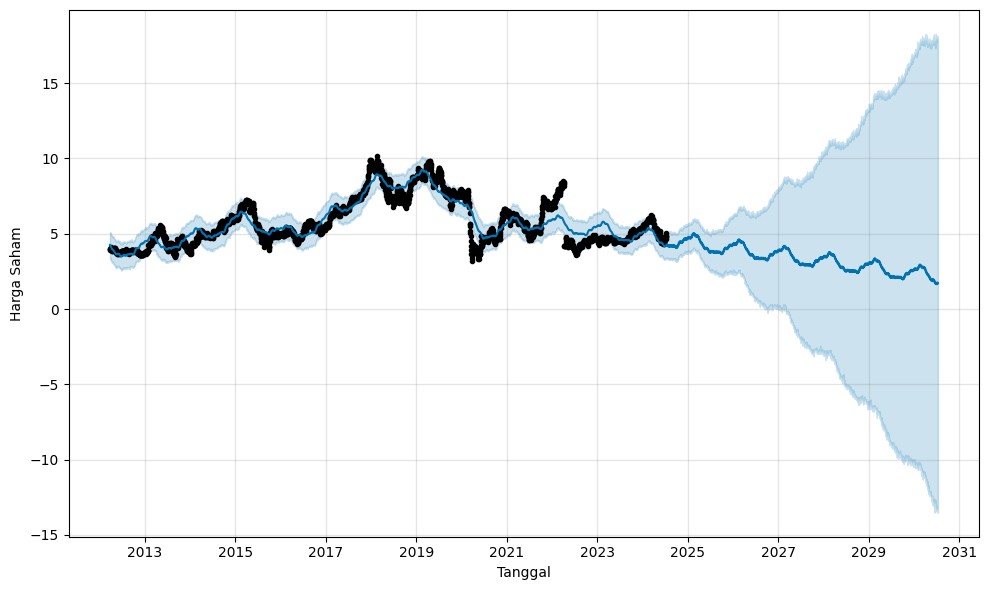

In [ ]:
# Visualize the predictions
model.plot(forecast)
plt.xlabel('Tanggal')
plt.ylabel('Harga Saham')
plt.show()

## Prophet additional with Regressor

In [ ]:
future = df[df.ds > '2022-04-22']
train = df[df.ds <= '2022-04-22']

In [ ]:
model = Prophet()
model.add_regressor('Vol.')
model.add_regressor('Perubahan%')
model.fit(train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz3ljkw1_/eu37jwx_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz3ljkw1_/l9_0buwk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51539', 'data', 'file=/tmp/tmpz3ljkw1_/eu37jwx_.json', 'init=/tmp/tmpz3ljkw1_/l9_0buwk.json', 'output', 'file=/tmp/tmpz3ljkw1_/prophet_modelp16fxs53/prophet_model-20240713062034.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:20:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:20:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future.drop(columns = 'y', inplace= True)

<ipython-input-296-d7a4ce43f1c7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  future.drop(columns = 'y', inplace= True)


In [ ]:
future.tail()

,ds,Pembukaan,Tertinggi,Terendah,Vol.,Perubahan%
4,2024-07-08,4.73,4.740,4.67,36000000.0,-0.0064
3,2024-07-09,4.67,4.870,4.67,87460000.0,0.0407
2,2024-07-10,4.85,4.900,4.82,48700000.0,-0.0082
1,2024-07-11,4.85,4.880,4.83,37570000.0,0.0104
0,2024-07-12,4.92,5.125,4.92,158760000.0,0.0318


In [ ]:
# Make predictions for the future dates
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
524,2024-07-08,8.452851,2.279566,13.261951
525,2024-07-09,8.419886,2.296830,13.589630
526,2024-07-10,8.427867,2.172336,13.433445
527,2024-07-11,8.559651,2.346179,13.640899
528,2024-07-12,8.168955,1.828433,13.030813


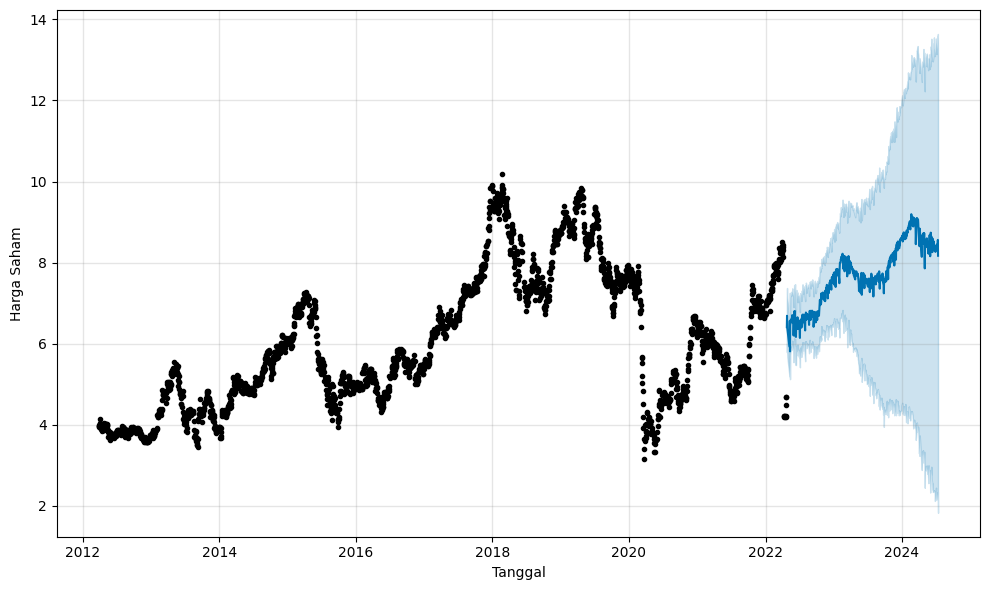

In [ ]:
# Visualize the predictions
model.plot(forecast)
plt.xlabel('Tanggal')
plt.ylabel('Harga Saham')
plt.show()

### Confirm the LSTM model's Produce an Error in Forecasting

In [ ]:
# Pilih fitur untuk prediksi
features = ['Terakhir', 'Pembukaan', 'Tertinggi', 'Terendah', 'Vol.', 'Perubahan%']

In [ ]:
# Normalisasi data
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[features]), columns=features, index=df.index)

In [ ]:
# Fungsi untuk membuat dataset time series
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [ ]:
# Persiapkan data untuk LSTM
time_steps = 30  # Jumlah hari sebelumnya yang digunakan untuk prediksi
X, y = create_dataset(df_scaled, df_scaled['Terakhir'], time_steps)

In [ ]:
# Split data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

In [ ]:
# Buat model LSTM
model = Sequential([
    LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')

In [ ]:
# Latih model
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2,
    shuffle=False
)

Epoch 1/10
59/59 [==============================] - 2s 20ms/step - loss: 0.0063 - val_loss: 0.0038
Epoch 2/10
59/59 [==============================] - 1s 20ms/step - loss: 0.0031 - val_loss: 0.0022
Epoch 3/10
59/59 [==============================] - 1s 20ms/step - loss: 0.0014 - val_loss: 0.0020
Epoch 4/10
59/59 [==============================] - 1s 21ms/step - loss: 9.2576e-04 - val_loss: 0.0020
Epoch 5/10
59/59 [==============================] - 1s 19ms/step - loss: 0.0010 - val_loss: 0.0019
Epoch 6/10
59/59 [==============================] - 1s 13ms/step - loss: 9.3799e-04 - val_loss: 0.0020
Epoch 7/10
59/59 [==============================] - 1s 13ms/step - loss: 9.2915e-04 - val_loss: 0.0019
Epoch 8/10
59/59 [==============================] - 1s 13ms/step - loss: 8.8377e-04 - val_loss: 0.0019
Epoch 9/10
59/59 [==============================] - 1s 13ms/step - loss: 8.5334e-04 - val_loss: 0.0018
Epoch 10/10
59/59 [==============================] - 1s 13ms/step - loss: 8.2431e-04 - va

In [ ]:
# Evaluasi model
train_loss = model.evaluate(X_train, y_train, verbose=0)
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f'Train Loss: {train_loss:.4f}')
print(f'Test Loss: {test_loss:.4f}')

Train Loss: 0.0012
Test Loss: 0.0018


In [ ]:
# Buat prediksi
y_pred = model.predict(X_test)

19/19 [==============================] - 0s 5ms/step


In [ ]:
# Inverse transform untuk mendapatkan harga asli
y_test_inv = scaler.inverse_transform(np.repeat(y_test.reshape(-1, 1), 6, axis=1))[:, 0]
y_pred_inv = scaler.inverse_transform(np.repeat(y_pred, 6, axis=1))[:, 0]

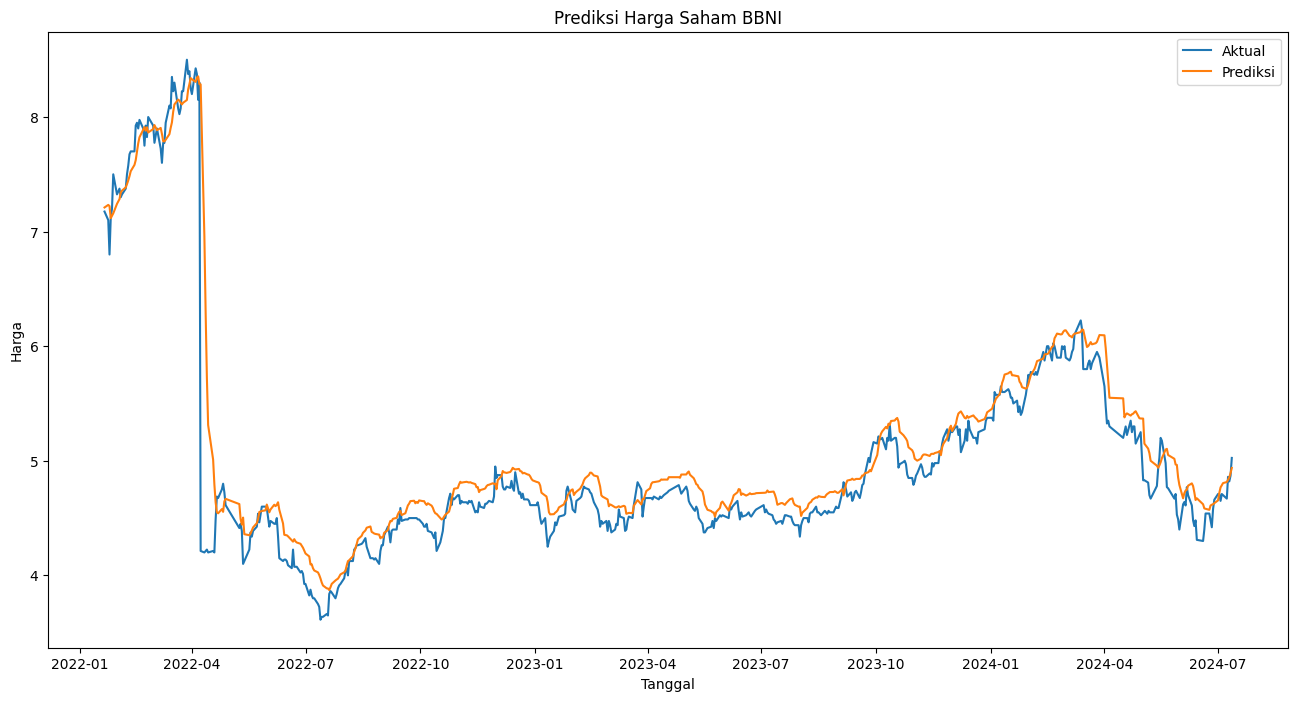

In [ ]:
# Plot hasil
plt.figure(figsize=(16,8))
plt.plot(df['Tanggal'].iloc[-len(y_test):], y_test_inv, label='Aktual')
plt.plot(df['Tanggal'].iloc[-len(y_test):], y_pred_inv, label='Prediksi')
plt.title('Prediksi Harga Saham BBNI')
plt.xlabel('Tanggal')
plt.ylabel('Harga')
plt.legend()
plt.show()

In [ ]:
# Prediksi untuk tahun-tahun berikutnya
future_days = 365 * 6  # 6 tahun ke depan
last_sequence = X_test[-1]
future_predictions = []

for _ in range(future_days):
    next_pred = model.predict(last_sequence.reshape(1, time_steps, -1))
    future_predictions.append(next_pred[0, 0])
    last_sequence = np.roll(last_sequence, -1, axis=0)
    last_sequence[-1] = next_pred

1/1 [==============================] - 0s 27ms/step


In [ ]:
# Inverse transform prediksi masa depan
future_predictions_inv = scaler.inverse_transform(np.repeat(np.array(future_predictions).reshape(-1, 1), 6, axis=1))[:, 0]

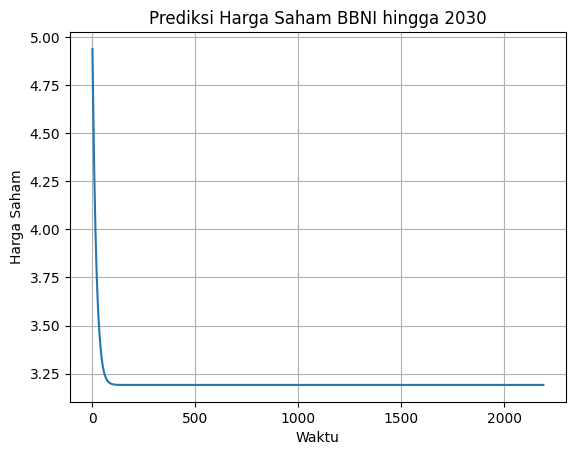

In [ ]:
# Buat plot
plt.plot(future_predictions_inv)

# Tambahkan label dan judul
plt.xlabel('Waktu') # Removed extra argument
plt.ylabel('Harga Saham') # Removed slicing as future_predictions is not a dataframe
plt.title('Prediksi Harga Saham BBNI hingga 2030')

# Tampilkan grid
plt.grid(True)

# Tampilkan plot
plt.show()

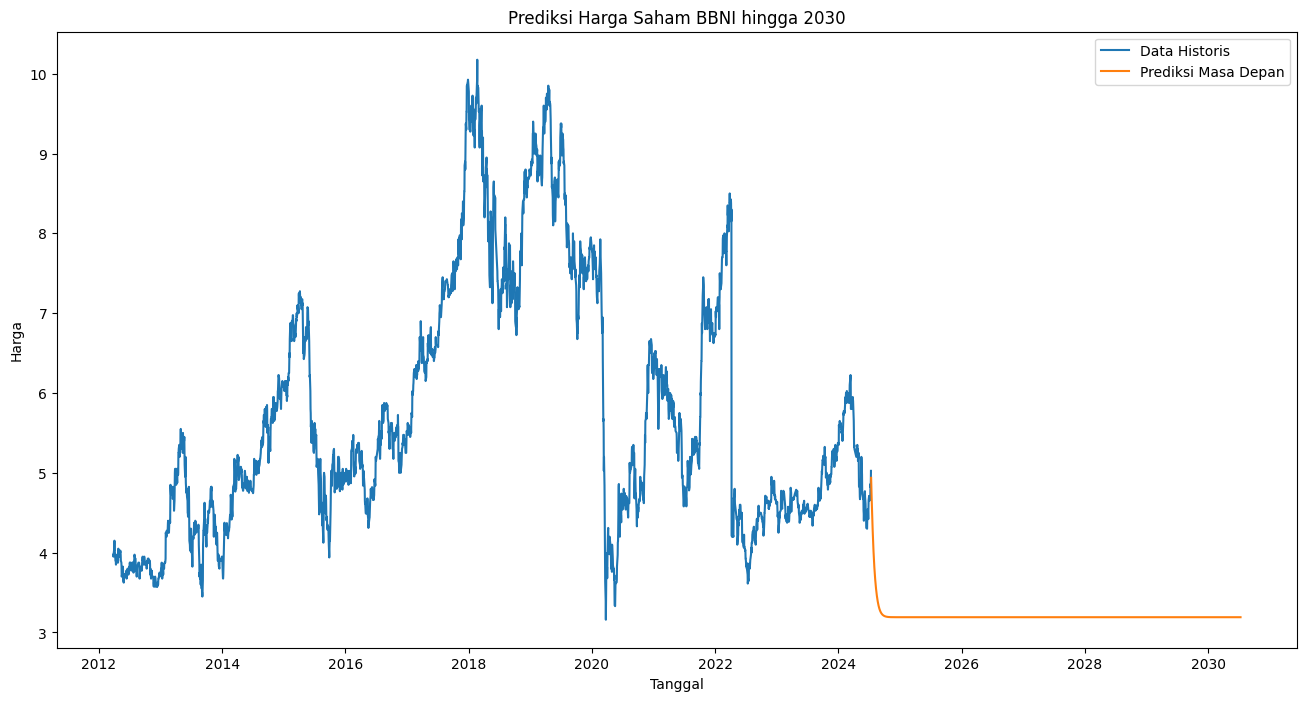

In [ ]:
# Plot prediksi masa depan
future_dates = pd.date_range(start=df['Tanggal'].iloc[-1], periods=future_days+1, freq='D')[1:]
plt.figure(figsize=(16,8))
plt.plot(df['Tanggal'], df['Terakhir'], label='Data Historis')
plt.plot(future_dates, future_predictions_inv, label='Prediksi Masa Depan')
plt.title('Prediksi Harga Saham BBNI hingga 2030')
plt.xlabel('Tanggal')
plt.ylabel('Harga')
plt.legend()
plt.show()

**Note:  it turns out that the LSTM model is not suitable in the case of predicting stock prices in this case**


---

# Project Summary 📝

*Finally, the project has been analyzing in Stock Price forecasting using the Case of BBNI (PT. BANK NEGARA INDONESIA (Persero).Tbk) which last stock price updated in july 12th 2024, 16:14 WIB and Here are the conclusions to give insight and knowledge more from three Deep Learning algorithm Models*

## Conclusion of This Case

I compared the performance of three time series forecasting models, ARIMA, LSTM, and Prophet, in predicting the stock price of BBNI. The results showed that Prophet outperformed the other two models regarding accuracy.

**Prophet** was able to capture the non-linear trend and seasonal patterns in the stock price data more effectively than ARIMA and LSTM. This is likely because Prophet is specifically designed for time series forecasting with strong seasonal effects.

**Here are some reasons why Prophet performed better than ARIMA and LSTM for forecasting BBNI stock prices:**

- Prophet is better at handling non-linear trends: ARIMA is a statistical model that assumes that the data is stationary and has a linear trend. However, the stock price data for BBNI is non-linear, which means that ARIMA is not well-suited for this data. LSTM is a neural network that can learn non-linear patterns in data, but it can be more difficult to train and tune than Prophet.
- Prophet is better at handling seasonal patterns: Prophet is specifically designed to handle time series data with strong seasonal effects. The stock price data for BBNI has strong seasonal patterns, which is why Prophet was able to outperform ARIMA and LSTM.
- Prophet is easier to use: Prophet is a relatively simple model to use, which makes it a good choice for practitioners who are not familiar with time series forecasting.

Overall, Prophet is a powerful and versatile tool for forecasting time series data. It is particularly well-suited for forecasting data with non-linear trends and strong seasonal patterns. For these reasons, Prophet is a good choice for forecasting the stock price of BBNI.

*It's important to note that no forecasting model is perfect, and all models will have some degree of error. However, Prophet is a good choice for forecasting BBNI stock prices based on the results of this Case Study.*

---

## Licence Notice ❗

COPYRIGHT © 2024 MUAMMAR YASIR. ALL RIGHTS RESERVED.

THIS PROJECT IS AN ORIGINAL WORK CREATED BY MUAMMAR YASIR ON GOOGLE COLAB. THE USE, COPYING, AND DISTRIBUTION OF PART OR ALL OF THIS PROJECT, WHETHER IN ORIGINAL OR MODIFIED FORM, WITHOUT THE WRITTEN PERMISSION OF THE COPYRIGHT OWNER IS PROHIBITED.

THIS PROJECT IS INTENDED FOR EDUCATIONAL AND REFERENCE PURPOSES ONLY. ALL IDEAS, CONCEPTS, AND IMPLEMENTATIONS IN THIS PROJECT ARE THE PROPERTY OF MUAMMAR YASIR AND MAY NOT BE USED FOR COMMERCIAL PURPOSES WITHOUT WRITTEN CONSENT. THANK YOU FOR ATTENTION!

**FOR FURTHER CRITISM AND SUGGESTION, ANY QUESTIONS OR USAGE REQUESTS**, PLEASE CONTACT https://itsmarmot.github.io/web.

*GOOGLE COLAB IS A PLATFORM PROVIDED BY GOOGLE TO SUPPORT RESEARCH AND EDUCATION IN MACHINE LEARNING AND DATA ANALYTICS. USE OF THIS PLATFORM DOES NOT GRANT ANY RIGHTS OR OWNERSHIP OF THIS PROJECT TO GOOGLE.*